Accuracy: 0.97
Precision: 0.96
Recall: 0.96
F1 Score: 0.96
   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   

  species  
0  setosa  
1  setosa  
2  setosa  
3  setosa  
4  setosa  


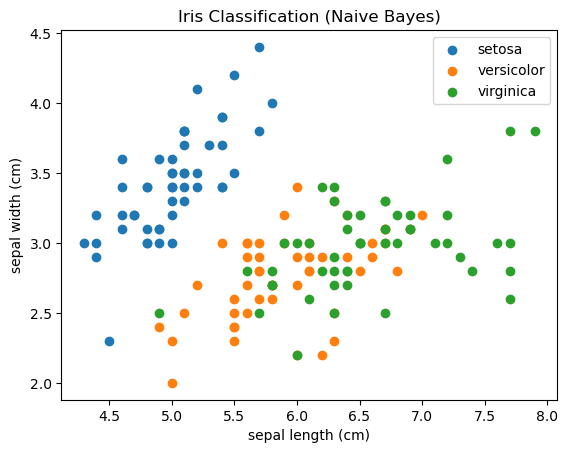

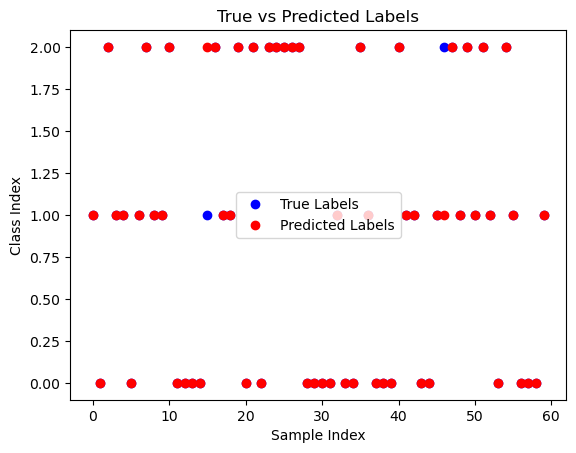

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

# 加载鸢尾花数据集
iris = datasets.load_iris()
X = iris.data
y = iris.target
feature_names = iris.feature_names
target_names = iris.target_names

# 划分数据集为训练集和测试集
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)

# 朴素贝叶斯分类器
gnb = GaussianNB()
gnb.fit(X_train, y_train)

# 预测测试集
y_pred = gnb.predict(X_test)

# 计算评估指标
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='macro')
recall = recall_score(y_test, y_pred, average='macro')
f1 = f1_score(y_test, y_pred, average='macro')

print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1 Score: {f1:.2f}")

# 数据表
data = pd.DataFrame(X, columns=feature_names)
data['species'] = pd.Categorical.from_codes(iris.target, iris.target_names)
print(data.head())

# 绘制分类结果图
for target, target_name in enumerate(target_names):
    X_plot = X[y == target]
    plt.scatter(X_plot[:, 0], X_plot[:, 1], label=target_name)

plt.legend()
plt.xlabel(feature_names[0])
plt.ylabel(feature_names[1])
plt.title("Iris Classification (Naive Bayes)")
plt.show()

# 绘制曲线图
plt.plot(y_test, 'bo', label='True Labels')
plt.plot(y_pred, 'ro', label='Predicted Labels')
plt.legend()
plt.xlabel('Sample Index')
plt.ylabel('Class Index')
plt.title("True vs Predicted Labels")
plt.show()
